In [1]:
import json
with open('samples.json', 'r') as json_file:
    data = json.load(json_file)

print(data)

{'sample0': {'major': 'English', 'grade': 'third', 'answer1': '"Liberal arts is an education in the fundamentals of humanities, social sciences, natural sciences, and mathematics. It is a broad-based education that emphasizes critical thinking, communication, and analytical skills. \\n"', 'answer2': '"\\"I\'ve found that studying liberal arts has given me a broader perspective on the world. It has taught me to think critically and ask questions. I\'ve been able to explore different subjects and discover my own interests. Liberal arts has also helped me develop communication skills, which are essential in any career.\\"\\n"'}, 'sample1': {'major': 'Political Science', 'grade': 'first', 'answer1': '"(Eric thinks for a moment) To me, liberal arts is the exploration of the various aspects of the humanities and social sciences. It provides a broad foundation of knowledge and skills that are applicable to a wide range of career paths.\\n"', 'answer2': '"\\"(Eric smiles) I\'ve found that the 

In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

# Assuming 'data' is the variable containing your dataset
# (same dataset as provided earlier)

# Create a DataFrame from the data
df = pd.DataFrame(data).T

# Concatenate the answers for analysis
df['answers'] = df['answer2']# + df['answer2']

# Tokenize and clean the text
stop_words = set(stopwords.words('english'))
keywords = []

for index, row in df.iterrows():
    tokens = word_tokenize(row['answers'].lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    unigrams = tokens
    bigrams = list(ngrams(tokens, 2))
    keywords.extend(unigrams + bigrams)

# Count the frequency of each keyword
keyword_counts = Counter(keywords)

# Display the most common keywords
print("Most common keywords:")
for word, count in keyword_counts.most_common(50):
    print(f"{word}: {count}")

Most common keywords:
arts: 1170
liberal: 1156
('liberal', 'arts'): 1153
education: 850
('arts', 'education'): 804
think: 709
different: 488
develop: 480
helped: 463
experience: 443
skills: 436
also: 426
world: 416
('experience', 'liberal'): 345
critical: 336
thinking: 334
critically: 324
('think', 'critically'): 322
found: 315
('helped', 'develop'): 296
learned: 296
('critical', 'thinking'): 254
history: 243
explore: 237
perspectives: 235
one: 222
subjects: 221
classes: 211
around: 204
range: 203
philosophy: 199
('world', 'around'): 197
understanding: 197
enlightened: 191
wide: 184
('found', 'liberal'): 182
taught: 181
literature: 181
really: 179
('wide', 'range'): 178
ideas: 167
able: 166
('thinking', 'skills'): 165
challenged: 164
('develop', 'critical'): 160
opportunity: 155
class: 152
exposed: 149
lot: 140
communication: 139


['liberal', 'arts', 'education', 'fundamentals', 'humanities', 'social', 'sciences', 'natural', 'sciences', 'mathematics', 'education', 'emphasizes', 'critical', 'thinking', 'communication', 'analytical', 'skills', "('liberal', 'arts', 'education')", "('arts', 'education', 'fundamentals')", "('education', 'fundamentals', 'humanities')", "('fundamentals', 'humanities', 'social')", "('humanities', 'social', 'sciences')", "('social', 'sciences', 'natural')", "('sciences', 'natural', 'sciences')", "('natural', 'sciences', 'mathematics')", "('sciences', 'mathematics', 'education')", "('mathematics', 'education', 'emphasizes')", "('education', 'emphasizes', 'critical')", "('emphasizes', 'critical', 'thinking')", "('critical', 'thinking', 'communication')", "('thinking', 'communication', 'analytical')", "('communication', 'analytical', 'skills')", 'eric', 'thinks', 'moment', 'liberal', 'arts', 'exploration', 'various', 'aspects', 'humanities', 'social', 'sciences', 'provides', 'broad', 'found

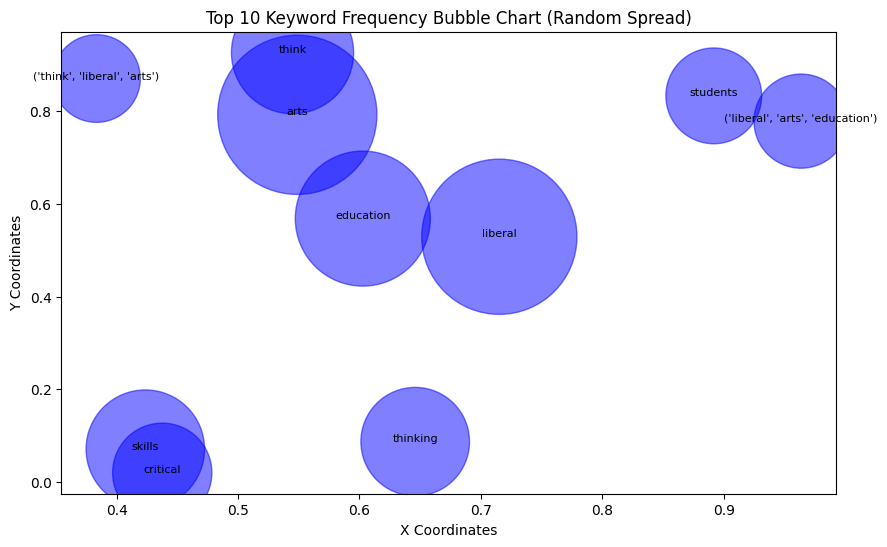

In [3]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'data' is the variable containing your dataset
# (same dataset as provided earlier)

# Create a DataFrame from the data
df = pd.DataFrame(data).T

# Concatenate the answers for analysis
df['answers'] = df['answer1']#  + df['answer2']

# Tokenize and clean the text
stop_words = set(stopwords.words('english'))
keywords = []

for index, row in df.iterrows():
    tokens = word_tokenize(row['answers'].lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    unigrams = tokens
    bigrams = list(ngrams(tokens, 3))
    bigrams = [str(i) for i in bigrams]
    keywords.extend(unigrams + bigrams)
    
print(keywords)


# Count the frequency of each keyword
keyword_counts = Counter(keywords)

top_keywords = dict(keyword_counts.most_common(10))

filtered_keywords = {keyword: count for keyword, count in top_keywords.items() if not any(word in keyword.lower() for word in ['liberal', 'art', 'education'])}

# Prepare data for bubble chart
keywords, frequencies = zip(*top_keywords.items())
sizes = [freq * 10 for freq in frequencies]  # Scale for better visualization

np.random.seed(0)  # Set a seed for reproducibility
x_coords = np.random.rand(len(keywords))
y_coords = np.random.rand(len(keywords))

# Create bubble chart with random coordinates
plt.figure(figsize=(10, 6))
plt.scatter(x_coords, y_coords, s=sizes, alpha=0.5, color='blue')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Top 10 Keyword Frequency Bubble Chart (Random Spread)')
for i, keyword in enumerate(keywords):
    plt.text(x_coords[i], y_coords[i], keyword, fontsize=8, ha='center')
plt.show()
